# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Дедлайн: 26 ноября 16:00**




**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Your answer here`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 38.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=99ab50a1e788fab091fc0267a2373aae73c36753671a5092f8ab17ec26685794
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [4]:
import ydata_profiling

In [5]:
# 1.1 Отображение 10 случайных строк тренировочного датасета
print("\n10 случайных строк тренировочного датасета:")
print(df_train.sample(10))

# 1.2 Отображение первых 5 и последних 5 объектов тестового датасета
print("\nПервые 5 объектов тестового датасета:")
print(df_test.head(5))

print("\nПоследние 5 объектов тестового датасета:")
print(df_test.tail(5))

# 1.3 Проверка на пропущенные значения
missing_values = df_train.isnull().sum()
columns_with_missing = missing_values[missing_values > 0].index.tolist()

print("\nПропущенные значения в тренировочном датасете:")
if columns_with_missing:
    print(f"Колонки с пропусками: {columns_with_missing}")
else:
    print("Пропущенных значений нет.")

# 1.4 Проверка на дубликаты
duplicates_count = df_train.duplicated().sum()
print(f"\nКоличество явных дубликатов в тренировочном датасете: {duplicates_count}")

# Бонус: создание дашборда с помощью ydata-profiling
profile = ydata_profiling.ProfileReport(df_train, title="EDA Report", explorative=True)
profile.to_file("eda_report.html")
print("\nДашборд сохранён в файл eda_report.html")



10 случайных строк тренировочного датасета:
                                        name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


Дашборд сохранён в файл eda_report.html


Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [6]:
# Проверка пропусков перед началом
print("Пропуски перед обработкой:")
print("Train missing values:")
print(df_train.isnull().sum())
print("\nTest missing values:")
print(df_test.isnull().sum())

# Выбор только числовых столбцов для вычисления медианы
numeric_columns = df_train.select_dtypes(include=["number"]).columns
medians = df_train[numeric_columns].median()

# Заполнение пропусков в числовых столбцах медианами
df_train[numeric_columns] = df_train[numeric_columns].fillna(medians)
df_test[numeric_columns] = df_test[numeric_columns].fillna(medians)

# Проверка пропусков после заполнения
print("\nПропуски после обработки:")
print("Train missing values:")
print(df_train.isnull().sum())
print("\nTest missing values:")
print(df_test.isnull().sum())

Пропуски перед обработкой:
Train missing values:
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

Test missing values:
name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

Пропуски после обработки:
Train missing values:
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats              0
dtype: int64

Test missing values:
name         

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [7]:
# Исключение целевой переменной из анализа
features_only = df_train.drop(columns=["selling_price"])

# 1. Проверка на наличие повторяющихся объектов
duplicates = features_only.duplicated(keep=False)  # Помечаем все дубликаты
duplicates_count = duplicates.sum()

print(f"Количество объектов с одинаковым признаковым описанием: {duplicates_count}")

# 2. Отображение дублирующихся объектов
if duplicates_count > 0:
    duplicate_rows = df_train[duplicates]
    print("\nДублирующиеся объекты:")
    print(duplicate_rows)

# 3. Удаление дубликатов, оставляя первую строку при различии цен
df_train = df_train.drop_duplicates(subset=features_only.columns, keep="first")

# 4. Обновление индексов строк
df_train.reset_index(drop=True, inplace=True)

Количество объектов с одинаковым признаковым описанием: 1799

Дублирующиеся объекты:
                                          name  year  selling_price  \
22                     Maruti Baleno Delta 1.2  2016         575000   
26                 Maruti Omni E MPI STD BS IV  2018         254999   
27             Maruti Vitara Brezza LDi Option  2017         670000   
28                          Fiat Palio 1.2 ELX  2003          70000   
29                   Maruti Omni 8 Seater BSIV  2012         150000   
...                                        ...   ...            ...   
6981  Ford Freestyle Titanium Plus Diesel BSIV  2018         750000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner

In [8]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [9]:
# Убедимся, что столбцы являются строковыми перед заменой
df_train['mileage'] = df_train['mileage'].astype(str).str.replace(r' kmpl| km/kg', '', regex=True)
df_train['mileage'] = pd.to_numeric(df_train['mileage'], errors='coerce')

df_train['engine'] = df_train['engine'].astype(str).str.replace(' CC', '')
df_train['engine'] = pd.to_numeric(df_train['engine'], errors='coerce')

df_train['max_power'] = df_train['max_power'].astype(str).str.replace(' bhp', '')
df_train['max_power'] = pd.to_numeric(df_train['max_power'], errors='coerce')

# Удаляем столбец 'torque'
df_train = df_train.drop(columns=['torque'])

# Повторяем для тестового датасета
df_test['mileage'] = df_test['mileage'].astype(str).str.replace(r' kmpl| km/kg', '', regex=True)
df_test['mileage'] = pd.to_numeric(df_test['mileage'], errors='coerce')

df_test['engine'] = df_test['engine'].astype(str).str.replace(' CC', '')
df_test['engine'] = pd.to_numeric(df_test['engine'], errors='coerce')

df_test['max_power'] = df_test['max_power'].astype(str).str.replace(' bhp', '')
df_test['max_power'] = pd.to_numeric(df_test['max_power'], errors='coerce')

# Удаляем столбец 'torque' для тестового датасета
df_test = df_test.drop(columns=['torque'])

# Проверим типы данных после преобразования
print("Типы данных в тренировочном датасете:")
print(df_train.dtypes)

print("\nТипы данных в тестовом датасете:")
print(df_test.dtypes)


Типы данных в тренировочном датасете:
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

Типы данных в тестовом датасете:
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object


<ipython-input-9-7d97e2d190e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['mileage'] = df_train['mileage'].astype(str).str.replace(r' kmpl| km/kg', '', regex=True)
<ipython-input-9-7d97e2d190e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['mileage'] = pd.to_numeric(df_train['mileage'], errors='coerce')
<ipython-input-9-7d97e2d190e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [10]:
# Преобразуем столбец engine в числовой тип, заменяя все недопустимые значения на NaN
df_train['engine'] = pd.to_numeric(df_train['engine'], errors='coerce')

# Если нужно, можно заполнить NaN значениями (например, средним или медианным значением)
df_train['engine'].fillna(df_train['engine'].mean(), inplace=True)

# Преобразуем в целочисленный тип
df_train['engine'] = df_train['engine'].astype(int)

# Преобразуем столбец seats в целочисленный тип
df_train['seats'] = df_train['seats'].astype(int)

# Повторяем для тестового датасета
df_test['engine'] = pd.to_numeric(df_test['engine'], errors='coerce')
df_test['engine'].fillna(df_test['engine'].mean(), inplace=True)
df_test['engine'] = df_test['engine'].astype(int)

df_test['seats'] = df_test['seats'].astype(int)

# Проверим типы данных после преобразования
print("Типы данных в тренировочном датасете после приведения типов:")
print(df_train.dtypes)

print("\nТипы данных в тестовом датасете после приведения типов:")
print(df_test.dtypes)


Типы данных в тренировочном датасете после приведения типов:
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object

Типы данных в тестовом датасете после приведения типов:
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object


<ipython-input-10-f8947be6b2b1>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['engine'].fillna(df_train['engine'].mean(), inplace=True)
<ipython-input-10-f8947be6b2b1>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [11]:
# Основные статистики для числовых столбцов в тренировочном датасете
num_stats_train = df_train.describe()

# Основные статистики для категориальных столбцов в тренировочном датасете
cat_stats_train = df_train.describe(include='object')

# Основные статистики для числовых столбцов в тестовом датасете
num_stats_test = df_test.describe()

# Основные статистики для категориальных столбцов в тестовом датасете
cat_stats_test = df_test.describe(include='object')

# Вывод результатов
print("Основные статистики для числовых столбцов в тренировочном датасете:")
print(num_stats_train)

print("\nОсновные статистики для категориальных столбцов в тренировочном датасете:")
print(cat_stats_train)

print("\nОсновные статистики для числовых столбцов в тестовом датасете:")
print(num_stats_test)

print("\nОсновные статистики для категориальных столбцов в тестовом датасете:")
print(cat_stats_test)


Основные статистики для числовых столбцов в тренировочном датасете:
              year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5654.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.432842  1435.404795   
std       4.095622   5.354320e+05  6.007114e+04     4.051002   484.546297   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.800000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.320000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5656.000000  5840.000000  
mean     88.103070     5.426712  
std      32.131943     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  


In [12]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

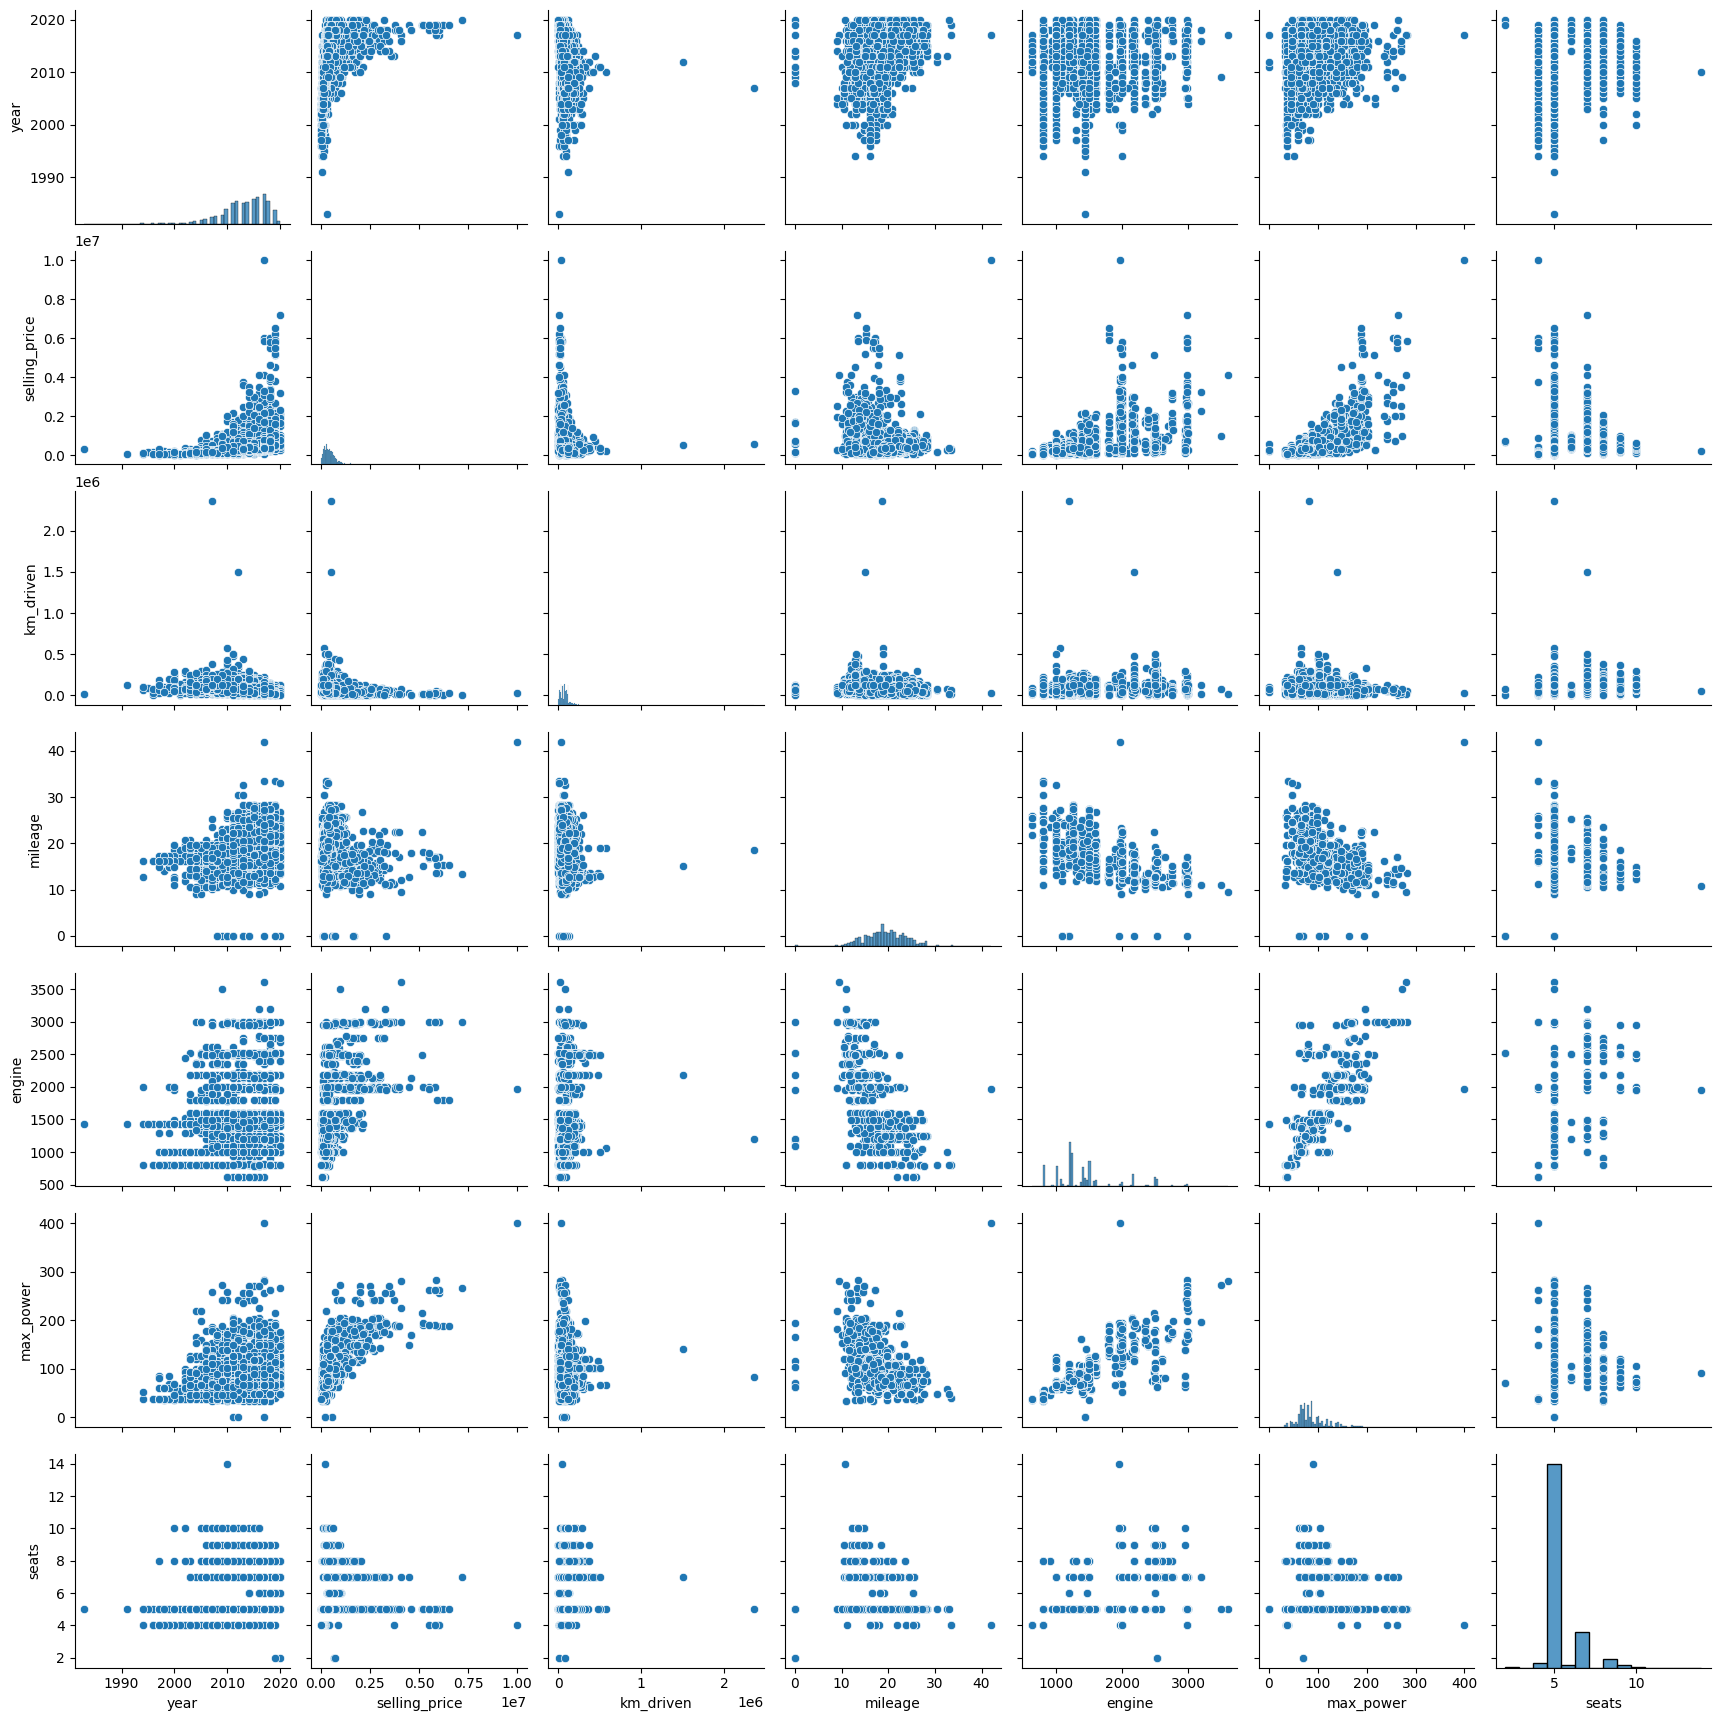

In [13]:
# Отбираем только числовые признаки для визуализации
numerical_columns = df_train.select_dtypes(include=['float64', 'int64']).columns

# Строим pairplot
sns.pairplot(df_train[numerical_columns])
plt.show()

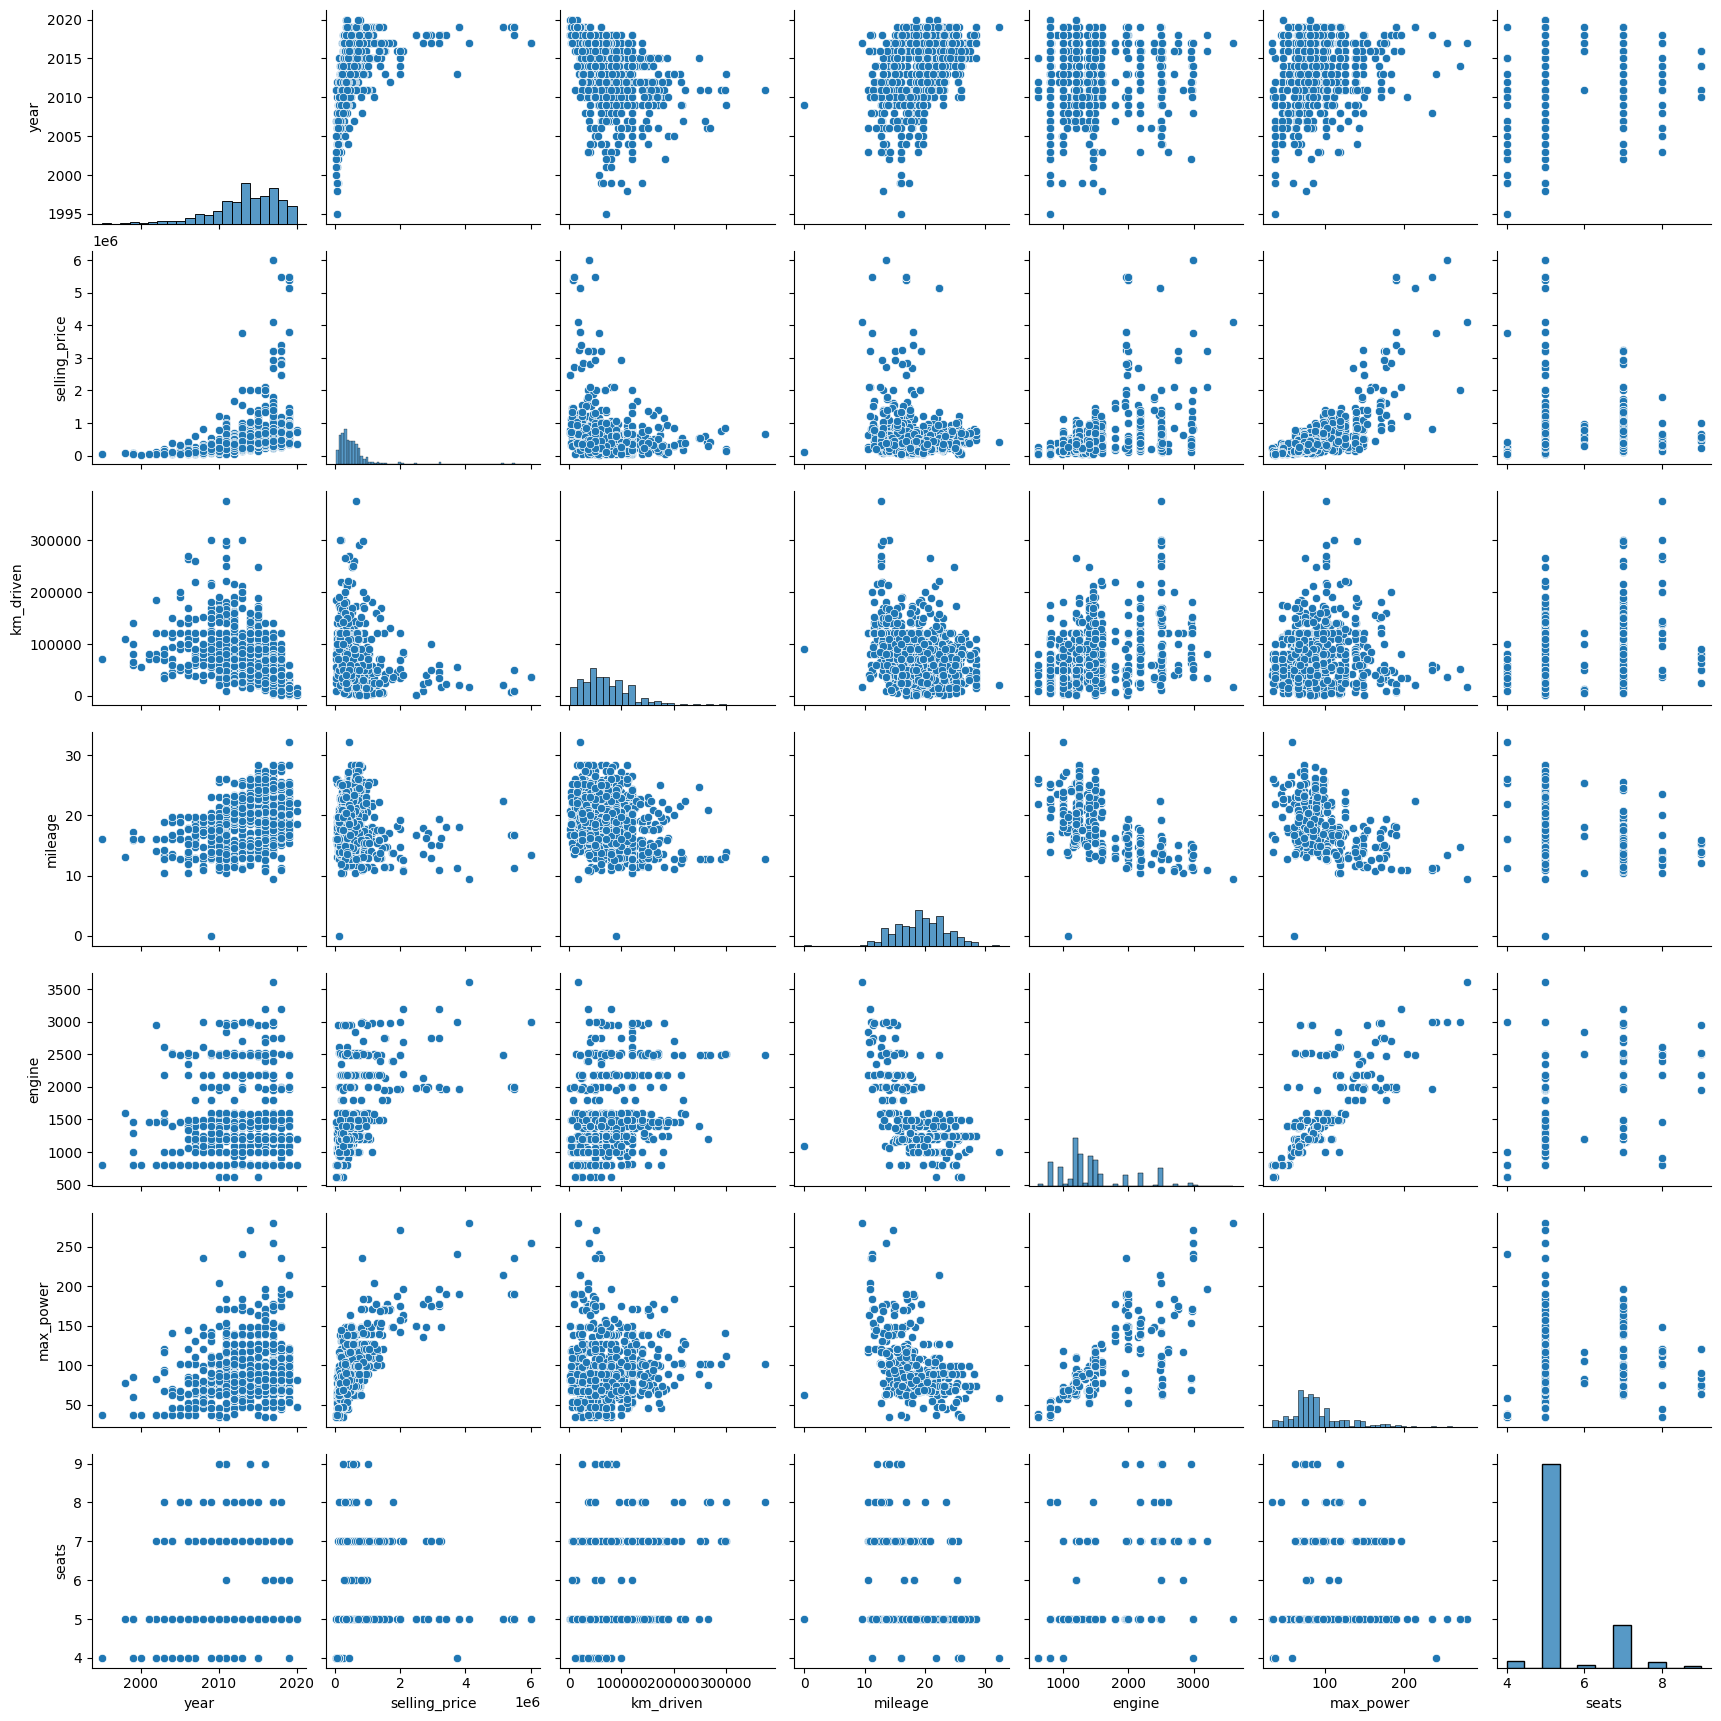

In [14]:
# Строим pairplot для тестовых данных
sns.pairplot(df_test[numerical_columns])
plt.show()


1. Связь признаков с целевой переменной:
  * На графиках видно, что признаки mileage, engine и max_power имеют явную зависимость от целевой переменной selling_price. Например, увеличение значения этих признаков связано с ростом цены автомобиля.
  * Признак seats не имеет явной зависимости от целевой переменной, распределение цены относительно количества мест выглядит менее выраженным.
2. Корреляции между признаками:
  * Наблюдается сильная корреляция между признаками engine и max_power, что ожидаемо, поскольку более мощные двигатели обычно имеют больший объём.
  * Также есть слабая корреляция между признаками engine и mileage, что может быть связано с тем, что автомобили с более крупными двигателями могут иметь меньший пробег.
3. Похожесть совокупностей на train и test:
  * Распределения признаков на тестовых данных совпадают с распределениями на тренировочных данных. Например, графики для признаков mileage, engine и max_power показывают схожие формы распределения в обоих датасетах.
  * Это подтверждает, что тестовая выборка имеет похожие характеристики с тренировочной, и разделение данных было сделано корректно.**Текст, выделенный полужирным шрифтом**

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


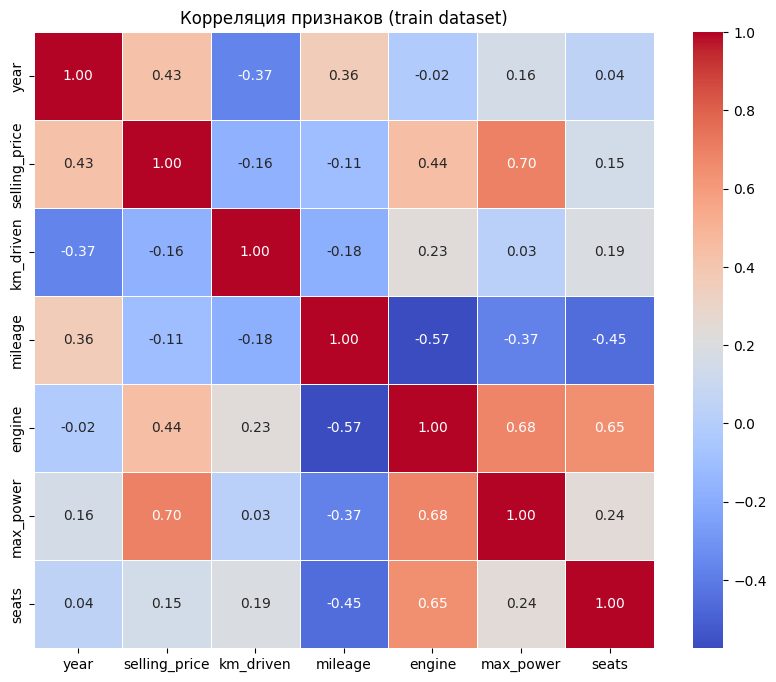

In [15]:
# Оставляем только числовые столбцы
numeric_columns = df_train.select_dtypes(include=['float64', 'int64'])

# Вычисляем коэффициенты корреляции Пирсона для числовых признаков
correlation_matrix = numeric_columns.corr()

# Строим тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляция признаков (train dataset)')
plt.show()


- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1. Какие 2 признака наименее скоррелированы между собой?
  * Наименее скоррелированные признаки — это те, у которых коэффициент корреляции близок к нулю. Согласно корреляционной матрице, например, year и mileage могут быть слабо или почти не коррелированы между собой.
2. Между какими признаками наблюдается довольно сильная положительная линейная зависимость?
  * Среди признаков, которые могут иметь сильную положительную корреляцию, можно ожидать engine и max_power, поскольку обычно большее количество лошадиных сил (max_power) связано с большими объемами двигателя (engine).
3. Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
  * Нет, это утверждение неправильно. Корреляция 0.36 указывает на слабую положительную связь, то есть, в среднем, чем старше машина, тем больше у нее может быть пробег. Однако эта связь не является сильной, и можно сказать, что утверждение о большем пробеге у машин старшего года — не является однозначным и подтверждается лишь слабо.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

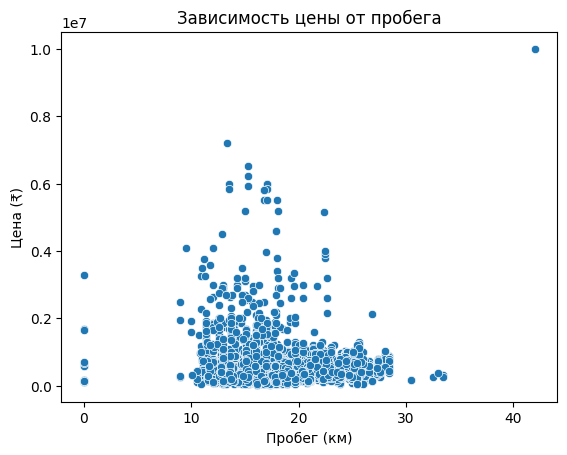

In [16]:
sns.scatterplot(x=df_train['mileage'], y=df_train['selling_price'])
plt.title('Зависимость цены от пробега')
plt.xlabel('Пробег (км)')
plt.ylabel('Цена (₹)')
plt.show()


Пояснение: Ожидается, что с увеличением пробега цена машины будет снижаться. Это логично, так как старые автомобили обычно дешевле.

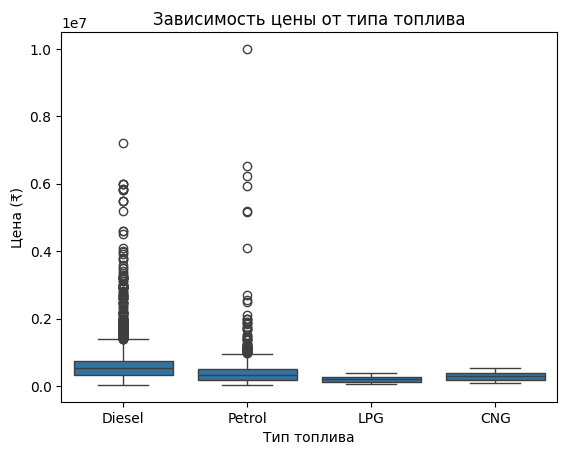

In [17]:
sns.boxplot(x=df_train['fuel'], y=df_train['selling_price'])
plt.title('Зависимость цены от типа топлива')
plt.xlabel('Тип топлива')
plt.ylabel('Цена (₹)')
plt.show()

Пояснение: Тип топлива может сильно влиять на цену автомобиля, так как дизельные или электрические автомобили могут быть дороже по сравнению с бензиновыми.

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [18]:
# Создаем новый DataFrame, содержащий только вещественные признаки
df_numeric = df_train.select_dtypes(include=['float64', 'int64'])

# Извлекаем целевую переменную из исходного тренировочного набора
y_train = df_train['selling_price']

# Убираем целевую переменную 'selling_price' из признаков (оставляем только вещественные признаки)
X_train = df_numeric.drop(columns=['selling_price'])

# Сохраняем названия столбцов перед стандартизацией
feature_names = X_train.columns


In [19]:
assert X_train.shape == (5840, 6)

In [20]:
# Для тестового набора также создаем аналогичные данные
df_numeric_test = df_test.select_dtypes(include=['float64', 'int64'])
y_test = df_test['selling_price']
X_test = df_numeric_test.drop(columns=['selling_price'])

In [21]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# Создаем объект SimpleImputer для замены NaN средним значением
imputer = SimpleImputer(strategy='mean')

# Применяем импьютер к тренировочным и тестовым данным
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Создаем модель линейной регрессии
model = LinearRegression()

# Обучаем модель на тренировочных данных
model.fit(X_train, y_train)

# Предсказания на тренировочном наборе
y_train_pred = model.predict(X_train)

# Предсказания на тестовом наборе
y_test_pred = model.predict(X_test)

# Вычисляем R2 и MSE для тренировочного набора
r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

# Вычисляем R2 и MSE для тестового набора
r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

# Выводим результаты
print(f"R2 для тренировочного набора: {r2_train:.4f}")
print(f"MSE для тренировочного набора: {mse_train:.4f}")
print(f"R2 для тестового набора: {r2_test:.4f}")
print(f"MSE для тестового набора: {mse_test:.4f}")


R2 для тренировочного набора: 0.5920
MSE для тренировочного набора: 116934703949.6115
R2 для тестового набора: 0.5937
MSE для тестового набора: 233551264527.9739


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [23]:
from sklearn.preprocessing import StandardScaler

# Создаем объект StandardScaler для стандартизации данных
scaler = StandardScaler()

# Обучаем стандартизатор только на тренировочных данных
X_train_scaled = scaler.fit_transform(X_train)

# Стандартизируем тестовые данные на основе параметров, полученных из тренировочных данных
X_test_scaled = scaler.transform(X_test)

# Создаем модель линейной регрессии
model = LinearRegression()

# Обучаем модель на стандартизированных тренировочных данных
model.fit(X_train_scaled, y_train)

# Предсказания на стандартизированных тренировочных данных
y_train_pred = model.predict(X_train_scaled)

# Предсказания на стандартизированных тестовых данных
y_test_pred = model.predict(X_test_scaled)

# Вычисляем R2 и MSE для тренировочного набора
r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

# Вычисляем R2 и MSE для тестового набора
r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

# Выводим результаты
print(f"R2 для тренировочного набора: {r2_train:.4f}")
print(f"MSE для тренировочного набора: {mse_train:.4f}")
print(f"R2 для тестового набора: {r2_test:.4f}")
print(f"MSE для тестового набора: {mse_test:.4f}")

R2 для тренировочного набора: 0.5920
MSE для тренировочного набора: 116934703949.6111
R2 для тестового набора: 0.5937
MSE для тестового набора: 233551264527.9638


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [24]:
# Получаем коэффициенты модели
coefficients = model.coef_

# Создаем DataFrame для удобства отображения коэффициентов
coeff_df = pd.DataFrame({
    'Feature': feature_names,  # Названия признаков
    'Coefficient': coefficients  # Коэффициенты
})

# Сортируем коэффициенты по абсолютному значению
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

# Выводим таблицу коэффициентов
print(coeff_df)

# Находим наиболее информативный признак
most_important_feature = coeff_df.iloc[0]
print(f"Наиболее информативный признак: {most_important_feature['Feature']} с коэффициентом {most_important_feature['Coefficient']}")


     Feature    Coefficient  Abs_Coefficient
4  max_power  321130.522260    321130.522260
0       year  158271.587438    158271.587438
3     engine   61018.898217     61018.898217
1  km_driven  -43330.450216     43330.450216
2    mileage   26666.719548     26666.719548
5      seats  -23030.917124     23030.917124
Наиболее информативный признак: max_power с коэффициентом 321130.52226026484


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [25]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Стандартизируем данные (используем те же стандартизаторы, что и для линейной регрессии)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создаем модель Lasso регрессии
lasso_model = Lasso(alpha=0.1)  # Параметр alpha регулирует степень регуляризации

# Обучаем модель на стандартизированных данных
lasso_model.fit(X_train_scaled, y_train)

# Предсказания на тренировочных и тестовых данных
y_train_pred = lasso_model.predict(X_train_scaled)
y_test_pred = lasso_model.predict(X_test_scaled)

# Оценка качества модели с использованием R² и MSE
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Выводим результаты
print(f"R² для тренировочных данных: {r2_train:.4f}")
print(f"MSE для тренировочных данных: {mse_train:.4f}")
print(f"R² для тестовых данных: {r2_test:.4f}")
print(f"MSE для тестовых данных: {mse_test:.4f}")

# Выводим коэффициенты для анализа отбора признаков
coefficients = lasso_model.coef_
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Сортируем по абсолютным значениям коэффициентов
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

# Печатаем самые значимые признаки
print("\nПризнаки с наибольшими коэффициентами (по модулю):")
print(coeff_df)


R² для тренировочных данных: 0.5920
MSE для тренировочных данных: 116934703949.7122
R² для тестовых данных: 0.5937
MSE для тестовых данных: 233551331305.3938

Признаки с наибольшими коэффициентами (по модулю):
     Feature    Coefficient  Abs_Coefficient
4  max_power  321130.611873    321130.611873
0       year  158271.559583    158271.559583
3     engine   61018.417470     61018.417470
1  km_driven  -43330.338865     43330.338865
2    mileage   26666.534699     26666.534699
5      seats  -23030.630781     23030.630781


In [26]:
# Выводим коэффициенты Lasso модели
lasso_coefficients = lasso_model.coef_

# Проверим, сколько коэффициентов равны нулю
zero_coefficients = (lasso_coefficients == 0).sum()

print(f"Количество занулённых коэффициентов: {zero_coefficients}")
print(f"Коэффициенты модели: {lasso_coefficients}")


Количество занулённых коэффициентов: 0
Коэффициенты модели: [158271.55958271 -43330.33886459  26666.53469925  61018.41746961
 321130.61187252 -23030.63078087]


Возможные причины зануления коэффициентов:
1. Регуляризация L1 (Lasso) применяет штраф за величину коэффициентов. В случае сильной регуляризации (при высоком значении alpha), некоторые коэффициенты могут быть занулены, так как L1 регуляризация склонна к полному занулению несущественных признаков.

2. Слишком высокая регуляризация: Если параметр alpha слишком высок, это может привести к тому, что модель будет стараться минимизировать вес признаков до нуля. Это помогает избежать переобучения, но также может убрать важные признаки.

3. Низкая важность признаков: Если признаки не влияют на целевую переменную или имеют очень слабую корреляцию с ней, регуляризация может занулить их коэффициенты.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [27]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Задаём параметры для поиска по сетке
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

# Инициализация Lasso модели
lasso = Lasso()

# Создаем объект GridSearchCV с 10 фолдами
grid_search = GridSearchCV(lasso, param_grid, cv=10)

# Обучаем модель с кросс-валидацией
grid_search.fit(X_train_scaled, y_train)

# Количество обученных моделей
print(f"Количество обученных моделей: {grid_search.n_splits_ * len(param_grid['alpha'])}")

# Лучшая модель
best_lasso_model = grid_search.best_estimator_

# Лучший коэффициент регуляризации
best_alpha = grid_search.best_params_['alpha']
print(f"Лучший коэффициент регуляризации (alpha): {best_alpha}")

# Проверяем, занулились ли коэффициенты при лучшем alpha
lasso_coefficients_best = best_lasso_model.coef_
zero_coefficients_best = (lasso_coefficients_best == 0).sum()
print(f"Количество занулённых коэффициентов: {zero_coefficients_best}")


Количество обученных моделей: 60
Лучший коэффициент регуляризации (alpha): 1000
Количество занулённых коэффициентов: 0


1. Количество обученных моделей:
Как и ожидалось, при 10 фолдах и 6 значениях alpha, было обучено 60 моделей.

2. Лучший коэффициент регуляризации (alpha):
Лучший коэффициент регуляризации составил 1000. Это означает, что при таком значении регуляризация оказывала наибольшее влияние на модель, что помогло минимизировать ошибку на кросс-валидации.

3. Количество занулённых коэффициентов:
Количество занулённых коэффициентов при alpha = 1000 — 0. Это означает, что при выбранном значении регуляризации модель не занулила ни один из коэффициентов. Влияние регуляризации при этом не привело к полному исключению признаков из модели. Это может говорить о том, что все признаки вносят некоторую полезную информацию, которая необходима для предсказания.

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [28]:
from sklearn.linear_model import ElasticNet

# Определим параметры для перебора
param_grid = {
    'alpha': np.logspace(-4, 4, 9),  # Параметры регуляризации alpha
    'l1_ratio': np.linspace(0, 1, 11)  # Параметры l1_ratio (от Lasso до Ridge)
}

# Инициализация модели ElasticNet
elastic_net = ElasticNet()

# Подбор гиперпараметров с кросс-валидацией
grid_search = GridSearchCV(elastic_net, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Лучшие параметры и качество модели
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Выводим результаты
print(f"Количество обученных моделей: {len(grid_search.cv_results_['mean_test_score'])}")
print(f"Лучшие гиперпараметры: alpha={best_params['alpha']}, l1_ratio={best_params['l1_ratio']}")
print(f"Лучший средний балл качества (по MSE): {best_score}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.542e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.195e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

Количество обученных моделей: 99
Лучшие гиперпараметры: alpha=0.1, l1_ratio=0.9
Лучший средний балл качества (по MSE): -121331009690.44902


1. Количество обученных моделей: 99 моделей. Это количество комбинаций гиперпараметров, протестированных с использованием 10-фолдовой кросс-валидации. Мы перебрали все возможные сочетания значений для alpha и l1_ratio из заданных диапазонов.

2. Лучшие гиперпараметры:
alpha = 0.1,
l1_ratio = 0.9
Это значения гиперпараметров, которые дали наилучшее качество модели на основе MSE (среднеквадратичной ошибки).

3. Лучший средний балл качества (по MSE):
Значение MSE составило -121331009690.4490. Это показатель качества модели, где меньшие (более отрицательные) значения MSE указывают на лучшее качество прогноза.

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [ ]:
# Удаляем столбец 'name' из датафрейма
df_train = df_train.drop(columns=['name'])

df_test = df_test.drop(columns=['name'])

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [29]:

# Применяем One-Hot Encoding к столбцу 'name'
df_train_encoded = pd.get_dummies(df_train, columns=['name'], drop_first=True)
df_test_encoded = pd.get_dummies(df_test, columns=['name'], drop_first=True)

# Предположим, что X_train_cat — это все категориальные признаки после one-hot кодирования
X_train_cat = df_train_encoded.select_dtypes(include=['object']).copy()
X_train_cat.shape


(5840, 4)

In [30]:
assert X_train_cat.shape == (5840, 4)

In [31]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [32]:
# Определяем категориальные признаки
categorical_features = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']

# Применяем OneHot-кодирование с параметром drop='first' для устранения мультиколлинеарности
df_train_encoded = pd.get_dummies(df_train, columns=categorical_features, drop_first=True)

# Разделяем на признаки и целевую переменную
X_train_encoded = df_train_encoded.drop('selling_price', axis=1)
y_train = df_train_encoded['selling_price']

# Проверяем размеры после кодирования
print(f"Размеры обучающего набора: {X_train_encoded.shape}")


Размеры обучающего набора: (5840, 1946)


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [41]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer, r2_score
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
# Кодируем тренировочные данные
X_train_encoded = encoder.fit_transform(X_train_cat)

# Параметры для перебора
alpha_values = [0.01, 0.1, 1, 10, 100, 1000]

# Определяем Ridge-регрессию
ridge = Ridge()

# Настраиваем GridSearchCV
ridge_grid = GridSearchCV(
    estimator=ridge,
    param_grid={'alpha': alpha_values},
    scoring=make_scorer(r2_score),  # Используем R2 как метрику
    cv=10,  # Кросс-валидация по 10 фолдам
    n_jobs=-1  # Параллельное выполнение
)

# Обучаем GridSearchCV на тренировочных данных
ridge_grid.fit(X_train_encoded, y_train)

# Лучшие параметры и результаты
best_alpha = ridge_grid.best_params_['alpha']
best_r2 = ridge_grid.best_score_

# Выводим результаты
print(f"Лучший параметр регуляризации alpha: {best_alpha}")
print(f"Лучший средний R2 (по кросс-валидации): {best_r2:.4f}")

# Прогноз на тестовых данных с лучшей моделью
ridge_best_model = ridge_grid.best_estimator_
ridge_r2_test = ridge_best_model.score(X_test_encoded, y_test)

print(f"R2 на тестовых данных: {ridge_r2_test:.4f}")


Лучший параметр регуляризации alpha: 10
Лучший средний R2 (по кросс-валидации): 0.3270


ValueError: X has 6 features, but Ridge is expecting 10 features as input.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [54]:
from sklearn.linear_model import LinearRegression

def business_metric(y_true, y_pred):
    # Рассчитываем абсолютную ошибку как долю от реальной цены
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    relative_error = np.abs(y_true - y_pred) / y_true
    return np.mean(relative_error <= 0.1)

# Предполагаем, что вы обучили модель линейной регрессии
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
print(business_metric(y_test, linear_model.predict(X_test_scaled)))
print(business_metric(y_test, linear_model.predict(X_test_scaled)))
print(business_metric(y_test, lasso_model.predict(X_test_scaled)))
print(business_metric(y_test, grid_search.predict(X_test_scaled)))

0.22
0.22
0.22
0.221


Поскольку все результаты примерно одинаковые, можно сделать вывод, что все три модели решают задачу бизнеса примерно одинаково эффективно с точки зрения данной метрики.


# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса